In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Lee datos en un DataFrame
AccidentesAviones = pd.read_csv('AccidentesAviones.csv')

### Vemos las columnas, sus nombres y datos que contienen

In [3]:
AccidentesAviones.head(3)

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...


In [4]:
# Cambia nombre de columnas para que tengan mismo formato
AccidentesAviones = AccidentesAviones.rename(columns={'HORA declarada': 'hora'})
AccidentesAviones = AccidentesAviones.rename(columns={'OperadOR': 'operador'})
AccidentesAviones = AccidentesAviones.rename(columns={'flight_no': 'nro_vuelo'})
AccidentesAviones = AccidentesAviones.rename(columns={'route': 'tipo_vuelo'})
AccidentesAviones = AccidentesAviones.rename(columns={'ac_type': 'tipo_vehiculo'})
AccidentesAviones = AccidentesAviones.rename(columns={'registration': 'matricula'})
AccidentesAviones = AccidentesAviones.rename(columns={'cn_ln': 'serie_id'})
AccidentesAviones = AccidentesAviones.rename(columns={'all_aboard': 'todos_a_bordo'})
AccidentesAviones = AccidentesAviones.rename(columns={'PASAJEROS A BORDO': 'pasajeros_a_bordo'})
AccidentesAviones = AccidentesAviones.rename(columns={'crew_aboard': 'tripulacion_a_bordo'})
AccidentesAviones = AccidentesAviones.rename(columns={'cantidad de fallecidos': 'cantidad_fallecidos'})
AccidentesAviones = AccidentesAviones.rename(columns={'passenger_fatalities': 'pasajeros_fallecidos'})
AccidentesAviones = AccidentesAviones.rename(columns={'crew_fatalities': 'tripulacion_fallecida'})
AccidentesAviones = AccidentesAviones.rename(columns={'ground': 'fallecidos_tierra'})
AccidentesAviones = AccidentesAviones.rename(columns={'summary': 'descripcion'})

Se identifico una necesidad: la estandarización de los nombres de las columnas en el mismo formato e idioma. Este proceso de normalización es fundamental para asegurar la coherencia y comprensión de nuestros datos. Además, nos permitirá acompañar los hallazgos con gráficos e información más precisa y efectiva.

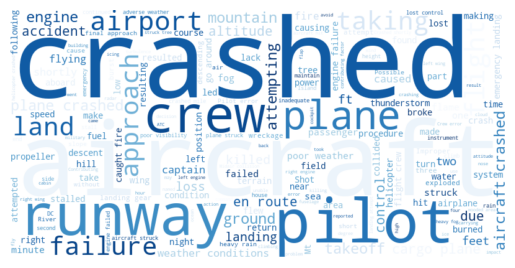

In [94]:
# Supongamos que tienes una columna llamada 'texto' que contiene el texto del que quieres crear la nube de palabras.
nube_descripcion = AccidentesAviones['descripcion']

# Combinar todos los textos en una sola cadena (esto es necesario para generar la nube de palabras)
texto_descripcion = ' '.join(nube_descripcion)

# Crear una instancia de WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(texto_descripcion)

# Mostrar la nube de palabras utilizando Matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

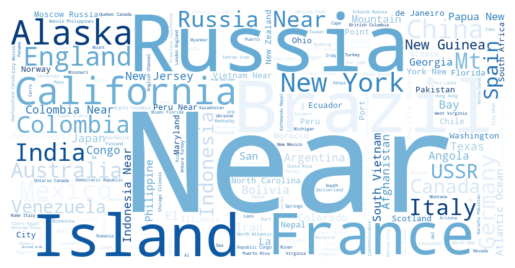

In [95]:
# Supongamos que tienes una columna llamada 'texto' que contiene el texto del que quieres crear la nube de palabras.
nube_ruta = AccidentesAviones['Ruta']

# Combinar todos los textos en una sola cadena (esto es necesario para generar la nube de palabras)
texto_ruta = ' '.join(nube_ruta)

# Crear una instancia de WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(texto_ruta)

# Mostrar la nube de palabras utilizando Matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Observemos información crucial sobre las columnas y el tipo de datos que contienen, así como la cantidad de registros no nulos presentes

In [5]:
AccidentesAviones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             5008 non-null   int64 
 1   fecha                  5008 non-null   object
 2   hora                   5008 non-null   object
 3   Ruta                   5008 non-null   object
 4   operador               5008 non-null   object
 5   nro_vuelo              5008 non-null   object
 6   tipo_vuelo             5007 non-null   object
 7   tipo_vehiculo          5008 non-null   object
 8   matricula              5008 non-null   object
 9   serie_id               5008 non-null   object
 10  todos_a_bordo          5008 non-null   object
 11  pasajeros_a_bordo      5008 non-null   object
 12  tripulacion_a_bordo    5008 non-null   object
 13  cantidad_fallecidos    5008 non-null   object
 14  pasajeros_fallecidos   5008 non-null   object
 15  tripulacion_fallecida

Como se puede observar, algunas de las columnas presentan un tipo de dato diferente al contenido que albergan. Por esta razón, se llevará a cabo una modificación con el fin de adecuarlos al formato correcto, preparándolos para su posterior analisis.

In [6]:
# La función lambda verifica que la cadena tenga 4 caracteres (como "1718") y la transforma a "17:18"
AccidentesAviones['hora'] = AccidentesAviones['hora'].apply(lambda x: x[:2] + ':' + x[2:] if len(x) == 4 else x)

# Reemplaza todos los signos ? por NaN
AccidentesAviones.replace('?', np.nan, inplace=True)

In [7]:
# Convierte la columna 'fecha' al formato de fecha de Pandas
AccidentesAviones['fecha'] = pd.to_datetime(AccidentesAviones['fecha'], format='%B %d, %Y', errors='coerce').dt.strftime('%Y-%m-%d')
AccidentesAviones['fecha'] = pd.to_datetime(AccidentesAviones['fecha'])

In [8]:
# Convierte la columna a tipo float64
AccidentesAviones['nro_vuelo'] = AccidentesAviones['nro_vuelo'].apply(pd.to_numeric, errors='coerce')
# Reemplaza los valores NaN por 0
AccidentesAviones['todos_a_bordo'] = AccidentesAviones['todos_a_bordo'].fillna(0)
AccidentesAviones['pasajeros_a_bordo'] = AccidentesAviones['pasajeros_a_bordo'].fillna(0)
AccidentesAviones['tripulacion_a_bordo'] = AccidentesAviones['tripulacion_a_bordo'].fillna(0)
AccidentesAviones['cantidad_fallecidos'] = AccidentesAviones['cantidad_fallecidos'].fillna(0)
AccidentesAviones['pasajeros_fallecidos'] = AccidentesAviones['pasajeros_fallecidos'].fillna(0)
AccidentesAviones['tripulacion_fallecida'] = AccidentesAviones['tripulacion_fallecida'].fillna(0)
AccidentesAviones['fallecidos_tierra'] = AccidentesAviones['fallecidos_tierra'].fillna(0)
# Convierte la columna a tipo int64
AccidentesAviones['todos_a_bordo'] = AccidentesAviones['todos_a_bordo'].astype('int64')
AccidentesAviones['pasajeros_a_bordo'] = AccidentesAviones['pasajeros_a_bordo'].astype('int64')
AccidentesAviones['tripulacion_a_bordo'] = AccidentesAviones['tripulacion_a_bordo'].astype('int64')
AccidentesAviones['cantidad_fallecidos'] = AccidentesAviones['cantidad_fallecidos'].astype('int64')
AccidentesAviones['pasajeros_fallecidos'] = AccidentesAviones['pasajeros_fallecidos'].astype('int64')
AccidentesAviones['tripulacion_fallecida'] = AccidentesAviones['tripulacion_fallecida'].astype('int64')
AccidentesAviones['fallecidos_tierra'] = AccidentesAviones['fallecidos_tierra'].astype('int64')

In [138]:
AccidentesAviones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             5008 non-null   int64         
 1   fecha                  5008 non-null   datetime64[ns]
 2   hora                   3504 non-null   object        
 3   Ruta                   5003 non-null   object        
 4   operador               4998 non-null   object        
 5   nro_vuelo              1156 non-null   float64       
 6   tipo_vuelo             4245 non-null   object        
 7   tipo_vehiculo          4995 non-null   object        
 8   matricula              4736 non-null   object        
 9   serie_id               4341 non-null   object        
 10  todos_a_bordo          5008 non-null   int64         
 11  pasajeros_a_bordo      5008 non-null   int64         
 12  tripulacion_a_bordo    5008 non-null   int64         
 13  can

### **Relacion entre Variables Numericas**

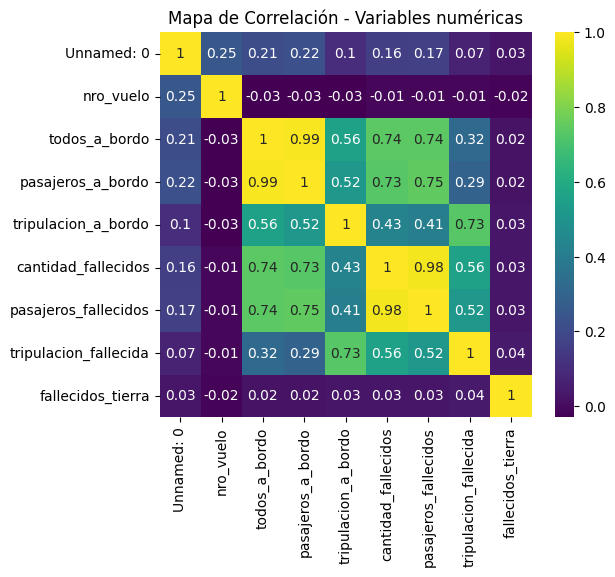

In [20]:
# Generamos un mapa de calor con las correlaciones de los todos los datos que contengan números 
dataNumerica = AccidentesAviones.select_dtypes(include=['number']) 
corr = dataNumerica.corr().round(2)

plt.figure(figsize=(6,5))
sns.heatmap(corr, cmap="viridis", annot=True)
plt.title('Mapa de Correlación - Variables numéricas')
plt.show()

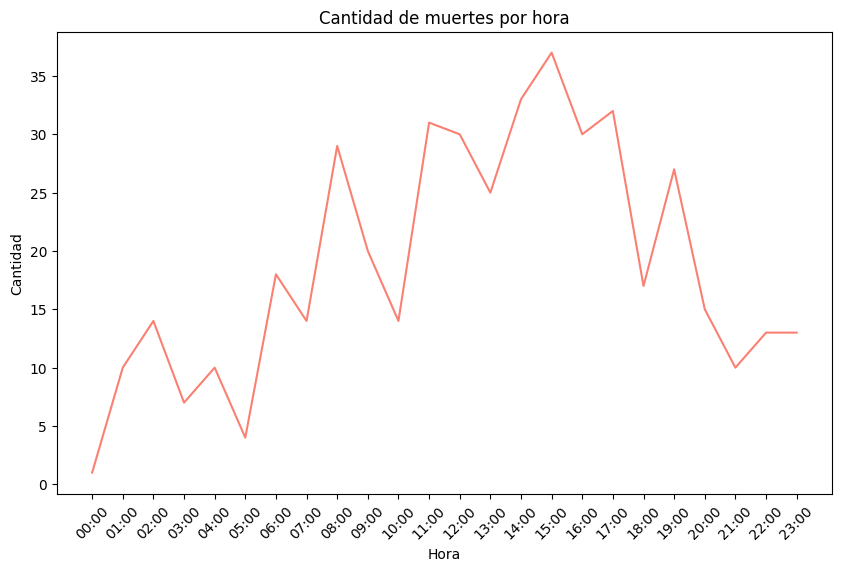

In [94]:
# Elimina los valores NaN de la columna 'horas'
hs_sin_nan = AccidentesAviones.dropna(subset=['hora'])

# Define una lista de todas las horas en el rango de 00:00 a 23:59
todas_las_horas = [f'{str(i).zfill(2)}:00' for i in range(24)]

# Cuenta las ocurrencias de cada hora y llena con ceros las horas faltantes
counts = hs_sin_nan['hora'].value_counts().reindex(todas_las_horas, fill_value=0)

# Crea un gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(counts.index, counts.values, color='salmon')
plt.xlabel('Hora')
plt.ylabel('Cantidad')
plt.title('Cantidad de muertes por hora')
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para una mejor legibilidad

plt.show()

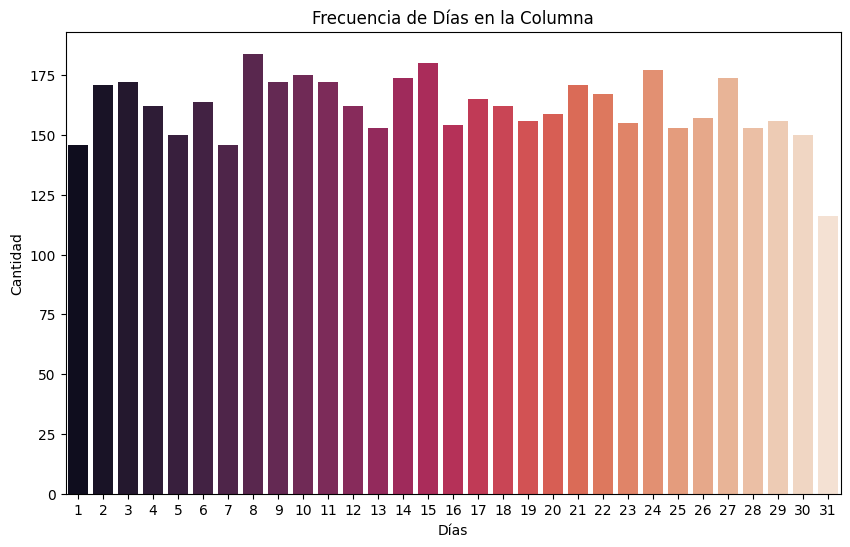

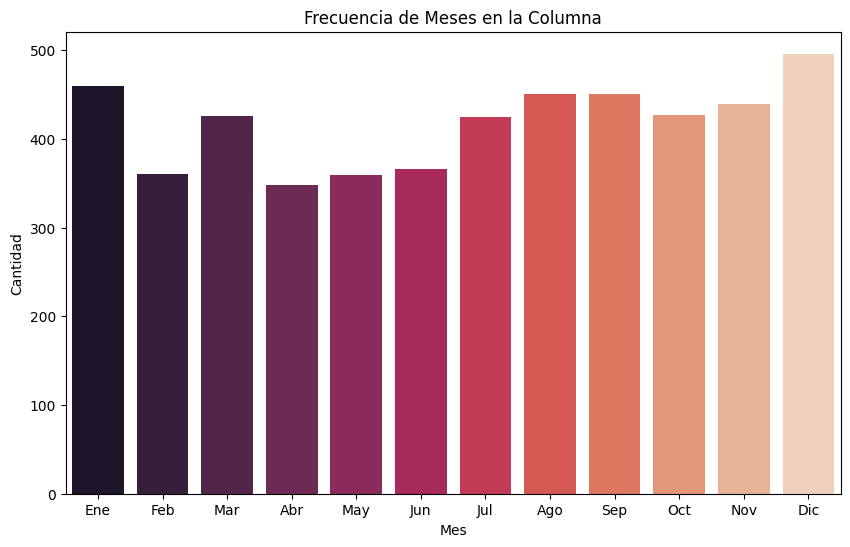

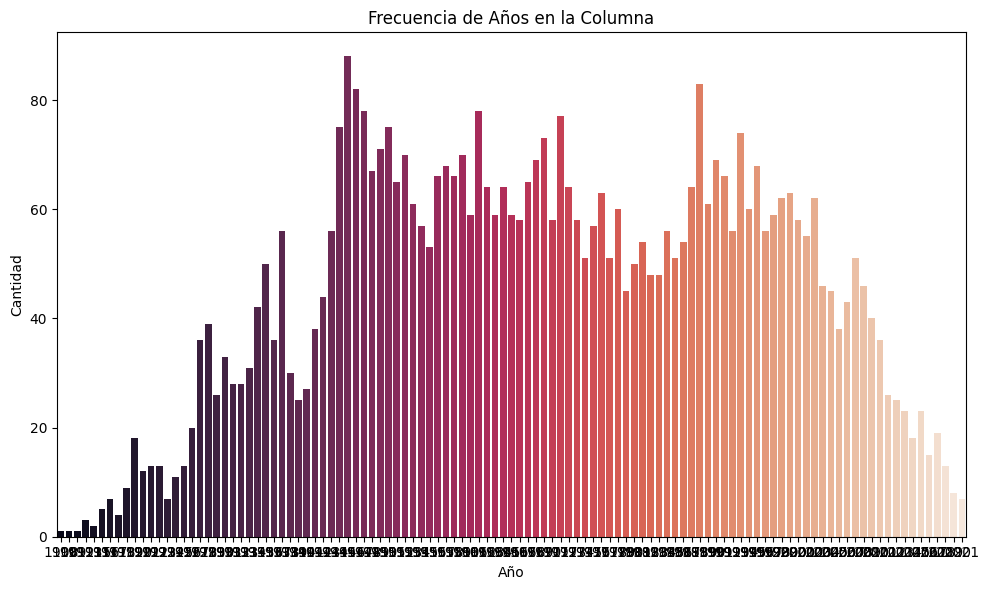

In [11]:
# Cuenta la frecuencia de cada día en la columna
day_counts = AccidentesAviones['fecha'].dt.day.value_counts().sort_index()
# Cuenta la frecuencia de cada mes en la columna
month_counts = AccidentesAviones['fecha'].dt.month.value_counts().sort_index()
# Cuenta la frecuencia de cada año en la columna
year_counts = AccidentesAviones['fecha'].dt.year.value_counts().sort_index()

# Nombres de los día en formato corto
dias = list(range(1,32))
# Nombres de los meses en formato corto
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
# Extrae los años presentes en tu DataFrame
años_presentes = list(year_counts.index)

# Filtra los años para mostrar solo cada 10 años
años_cada_10 = [año for año in años_presentes if año % 10 == 0]

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))

ax = sns.barplot(x=dias, y=day_counts, palette="rocket")
ax.set_title('Frecuencia de Días en la Columna')
ax.set_xlabel('Días')
ax.set_ylabel('Cantidad')

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))

ay = sns.barplot(x=meses, y=month_counts, palette="rocket")
ay.set_title('Frecuencia de Meses en la Columna')
ay.set_xlabel('Mes')
ay.set_ylabel('Cantidad')

# Obtén una paleta de colores en degradado de Seaborn
colores_degradados = sns.color_palette("coolwarm")

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))


az = sns.barplot(x=años_presentes, y=year_counts, palette="rocket")
az.set_title('Frecuencia de Años en la Columna')
az.set_xlabel('Año')
az.set_ylabel('Cantidad') # Rota las etiquetas del eje X para una mejor legibilidad

plt.tight_layout()
plt.show()

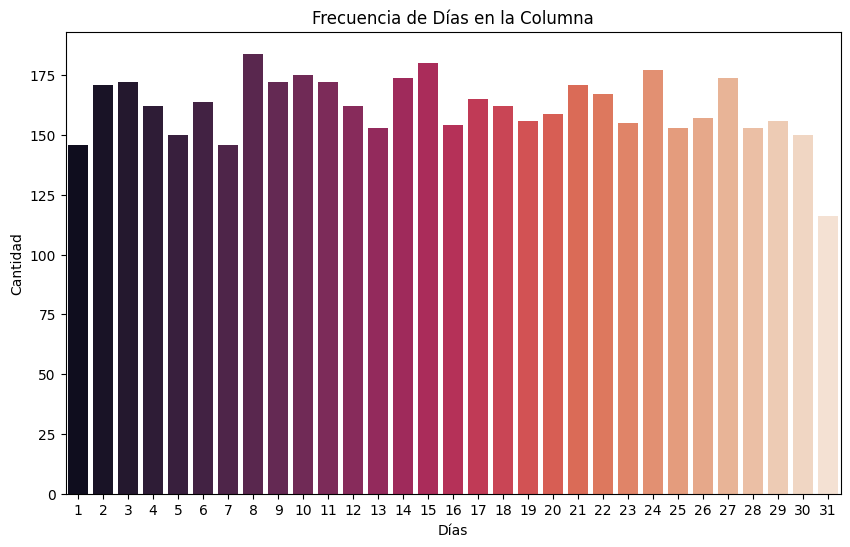

In [96]:
# Cuenta la frecuencia de cada día en la columna
day_counts = AccidentesAviones['fecha'].dt.day.value_counts().sort_index()

# Nombres de los día en formato corto
dias = list(range(1,32))

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))

ax = sns.barplot(x=dias, y=day_counts, palette="rocket")
ax.set_title('Frecuencia de Días en la Columna')
ax.set_xlabel('Días')
ax.set_ylabel('Cantidad')

plt.show()

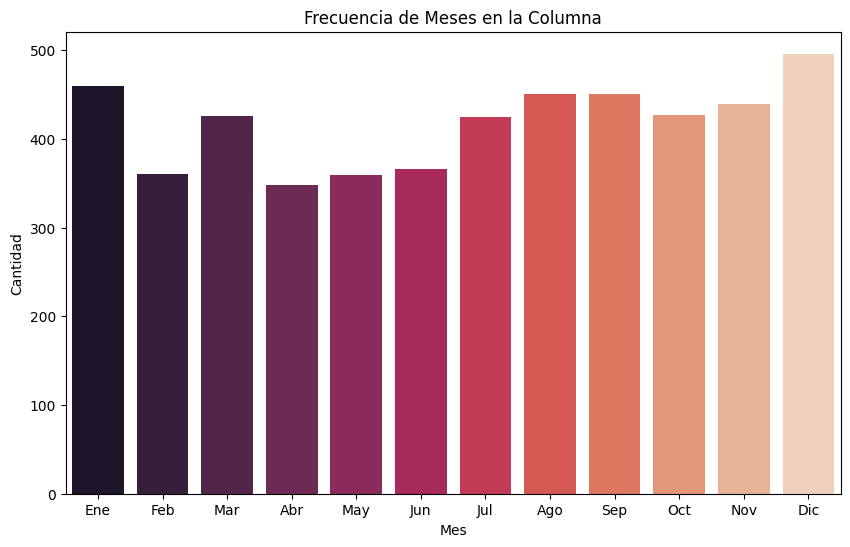

In [97]:
# Cuenta la frecuencia de cada mes en la columna
month_counts = AccidentesAviones['fecha'].dt.month.value_counts().sort_index()

# Nombres de los meses en formato corto
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))

ax = sns.barplot(x=meses, y=month_counts, palette="rocket")
ax.set_title('Frecuencia de Meses en la Columna')
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad')

plt.show()

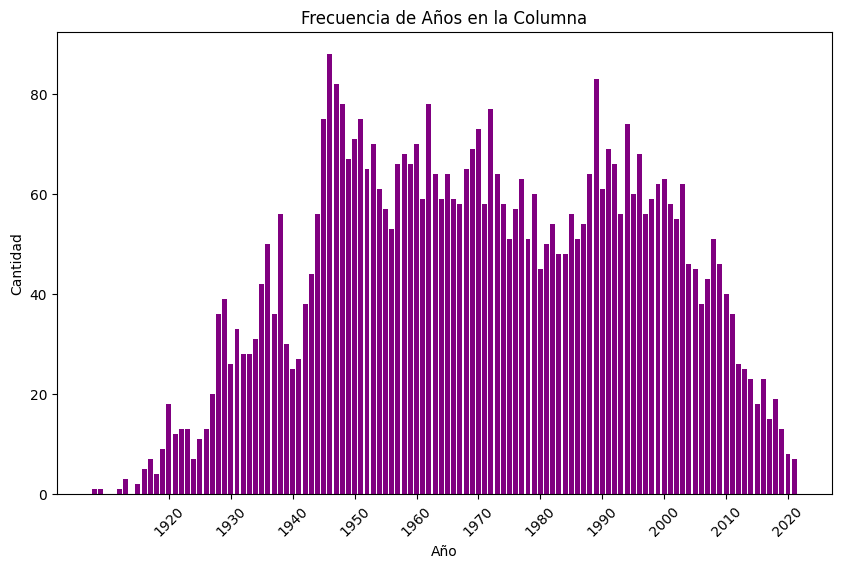

In [14]:
# Cuenta la frecuencia de cada año en la columna
year_counts = AccidentesAviones['fecha'].dt.year.value_counts().sort_index()

# Extrae los años presentes en tu DataFrame
años_presentes = list(year_counts.index)

# Filtra los años para mostrar solo cada 10 años
años_cada_10 = [año for año in años_presentes if año % 10 == 0]

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(años_presentes, year_counts, color='purple')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Frecuencia de Años en la Columna')
plt.xticks(años_cada_10, rotation=45)  # Rota las etiquetas del eje X para una mejor legibilidad

plt.show()

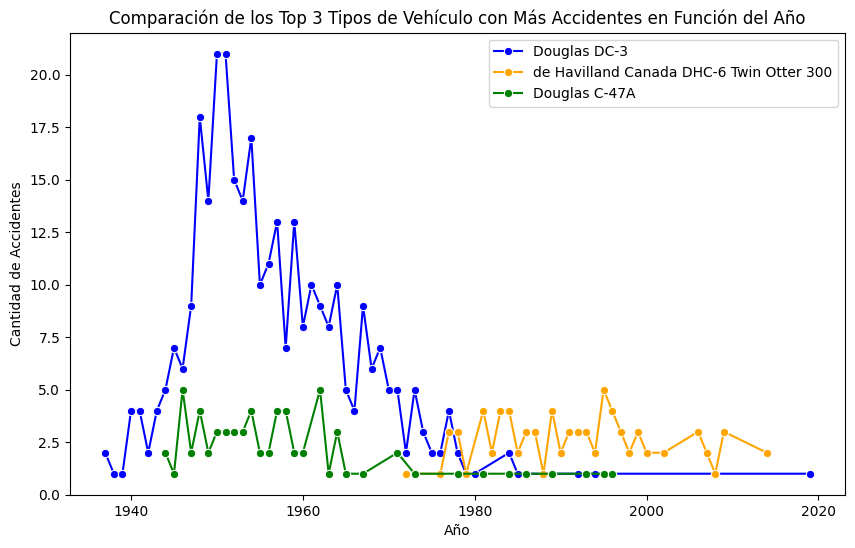

In [13]:
# Copia el DataFrame en la variable para que no me modifique el original
df_fechas = AccidentesAviones.copy()

# Convierte 'fecha' en formato datetime.
df_fechas['fecha'] = pd.to_datetime(df_fechas['fecha'])

# Agregar una columna 'año' para extraer el año de la fecha
df_fechas['año'] = df_fechas['fecha'].dt.year

# Contar la cantidad de accidentes por tipo de vehículo y año
accidentes_por_vehiculo_y_año = df_fechas.groupby(['tipo_vehiculo', 'año']).size().reset_index(name='cantidad_accidentes')

# Seleccionar los 5 tipos de vehículos principales
top_3_tipos_vehiculo = accidentes_por_vehiculo_y_año.groupby('tipo_vehiculo')['cantidad_accidentes'].sum().nlargest(3).index

# Crear un lineplot para comparar la cantidad de accidentes por vehículo en función del año
plt.figure(figsize=(10, 6))

# Lista de colores para trazar las líneas
colores = ['blue', 'orange', 'green']

for tipo, color in zip(top_3_tipos_vehiculo, colores):
    subset = accidentes_por_vehiculo_y_año[accidentes_por_vehiculo_y_año['tipo_vehiculo'] == tipo]
    sns.lineplot(data=subset, x='año', y='cantidad_accidentes', label=tipo, marker='o', color=color)

plt.xlabel('Año')
plt.ylabel('Cantidad de Accidentes')
plt.title('Comparación de los Top 3 Tipos de Vehículo con Más Accidentes en Función del Año')
plt.legend(loc='upper right')
plt.show()

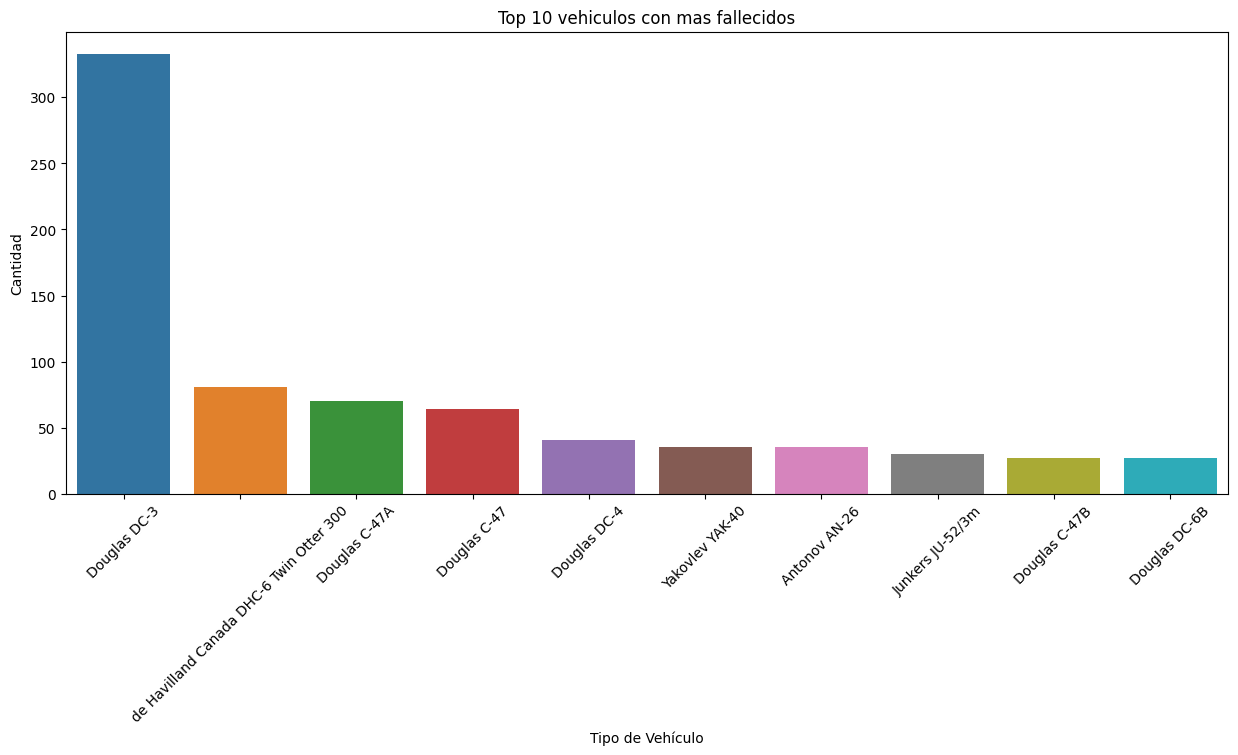

In [102]:
# Obtener los 10 vehículos que más aparecen excluyendo NaN
top_10_vehiculos = AccidentesAviones['tipo_vehiculo'].value_counts().head(10)

# Crear un gráfico de barras
plt.figure(figsize=(15, 6))
ax = sns.barplot(x=top_10_vehiculos.index, y=top_10_vehiculos.values, palette="tab10")
ax.set_title('Top 10 vehiculos con mas fallecidos')
ax.set_xlabel('Tipo de Vehículo')
ax.set_ylabel('Cantidad')

# Rotar las etiquetas del eje X para una mejor legibilidad
plt.xticks(rotation=45)

plt.show()


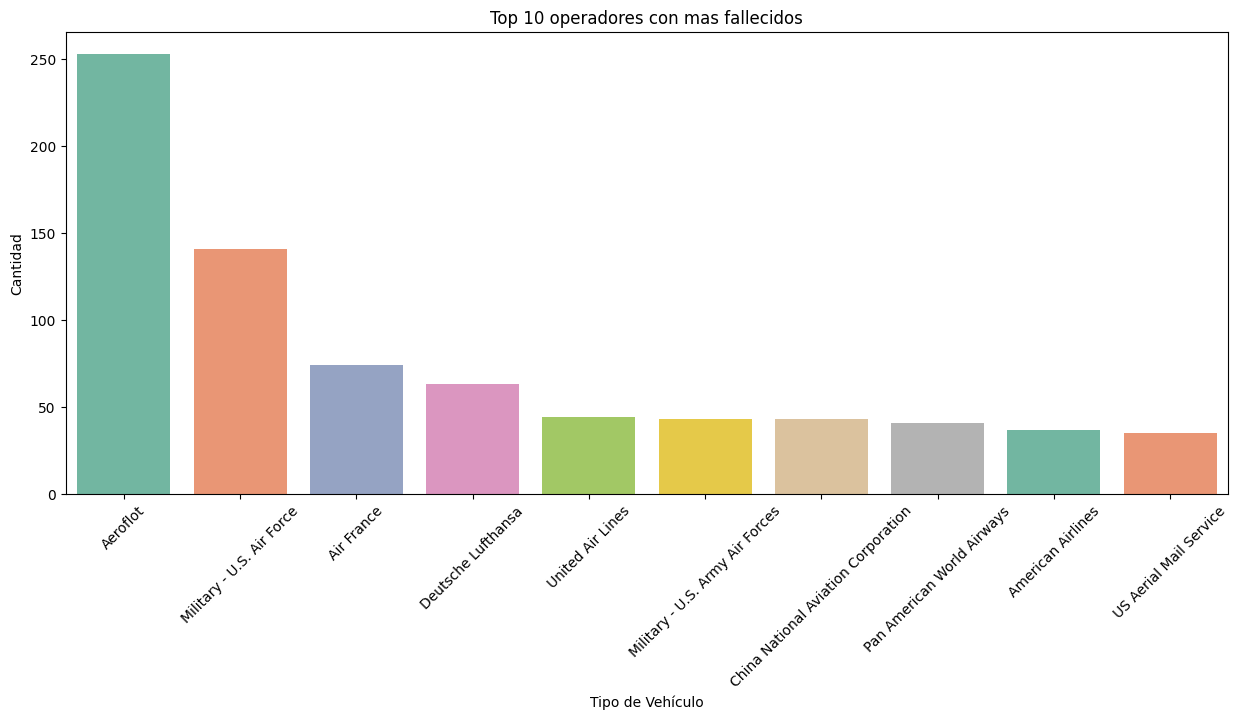

In [103]:
# Obtener los 10 vehículos que más aparecen excluyendo NaN
top_10_operador = AccidentesAviones['operador'].value_counts().head(10)

# Crear un gráfico de barras
plt.figure(figsize=(15, 6))
ax = sns.barplot(x=top_10_operador.index, y=top_10_operador.values, palette="Set2")
ax.set_title('Top 10 operadores con mas fallecidos')
ax.set_xlabel('Tipo de Vehículo')
ax.set_ylabel('Cantidad')

# Rotar las etiquetas del eje X para una mejor legibilidad
plt.xticks(rotation=45)

plt.show()

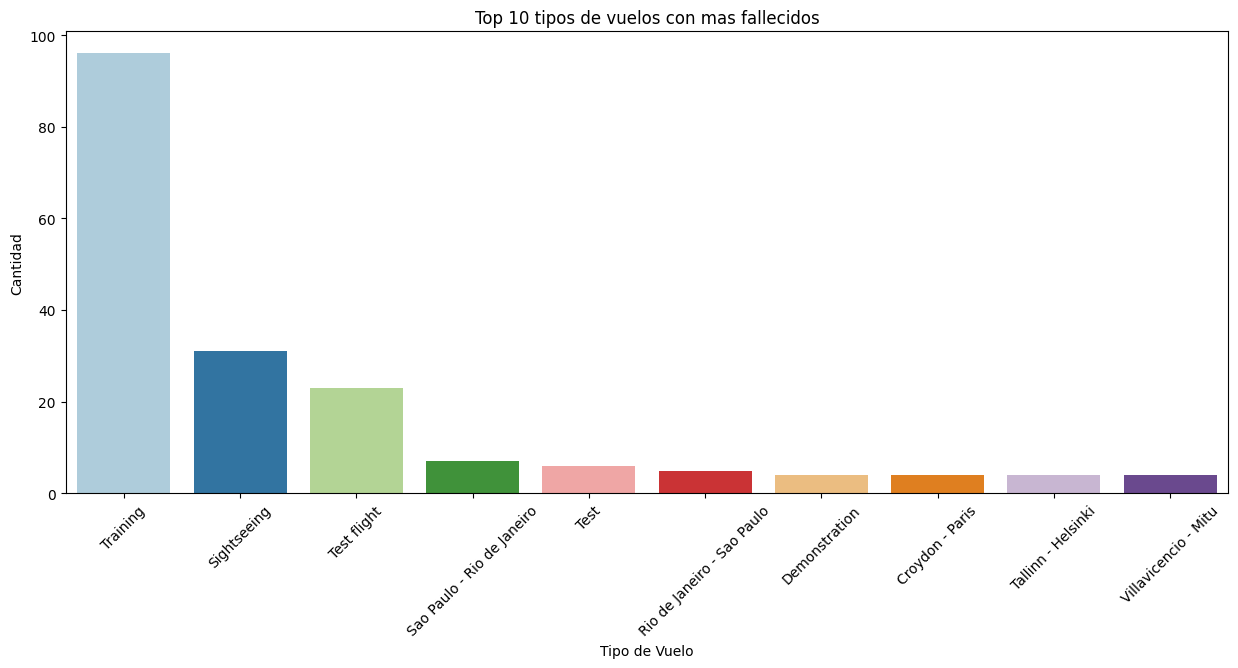

In [70]:
# Obtener los 10 vehículos que más aparecen excluyendo NaN
top_10_tipo_vuelo = AccidentesAviones['tipo_vuelo'].value_counts().head(10)

# Crear un gráfico de barras
plt.figure(figsize=(15, 6))
ax = sns.barplot(x=top_10_tipo_vuelo.index, y=top_10_tipo_vuelo.values, palette="Paired")
ax.set_title('Top 10 tipos de vuelos con mas fallecidos')
ax.set_xlabel('Tipo de Vuelo')
ax.set_ylabel('Cantidad')

# Rotar las etiquetas del eje X para una mejor legibilidad
plt.xticks(rotation=45)

plt.show()

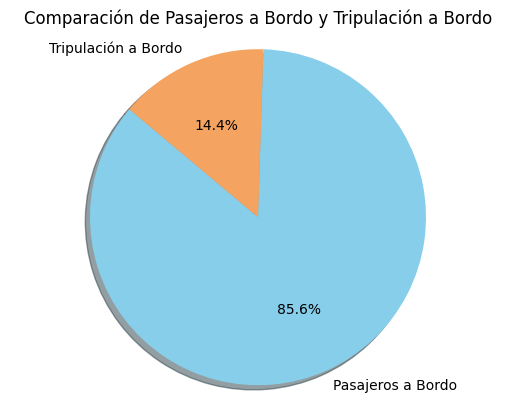

In [80]:
# Sumar la cantidad de pasajeros fallecidos y tripulación fallecida
pasajeros_a_bordo = AccidentesAviones['pasajeros_a_bordo'].sum()
tripulacion_a_bordo = AccidentesAviones['tripulacion_a_bordo'].sum()

# Crear un gráfico de torta
labels = 'Pasajeros a Bordo', 'Tripulación a Bordo'
sizes = [pasajeros_a_bordo, tripulacion_a_bordo]
colors = ['skyblue', 'sandybrown']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio garantiza que la torta sea circular.

plt.title('Comparación de Pasajeros a Bordo y Tripulación a Bordo')

plt.show()

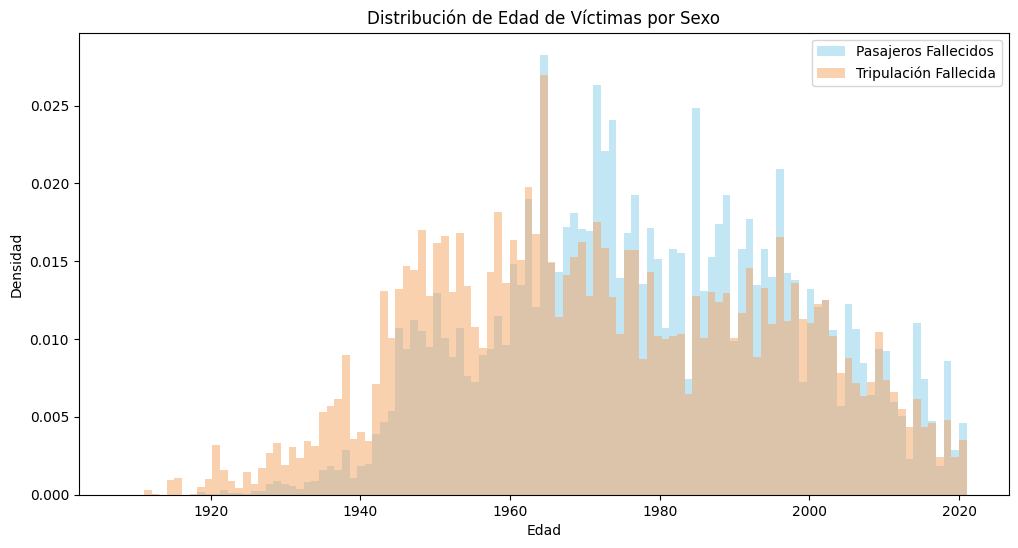

In [62]:
# Agrupar por año y sumar la cantidad de pasajeros fallecidos por año
total_pasajeros_fallecidos = AccidentesAviones.groupby(df_fechas['fecha'].dt.year)['pasajeros_fallecidos'].sum()

# Agrupar por año y sumar la cantidad de tripulacion fallecidos por año
total_tripulacion_fallecida = AccidentesAviones.groupby(df_fechas['fecha'].dt.year)['tripulacion_fallecida'].sum()

# Crear el histograma
plt.figure(figsize=(12, 6))
plt.hist(total_pasajeros_fallecidos.index, bins=len(total_pasajeros_fallecidos), weights=total_pasajeros_fallecidos.values, alpha=0.5, color='skyblue', label='Pasajeros Fallecidos', density=True)
plt.hist(total_tripulacion_fallecida.index, bins=len(total_tripulacion_fallecida), weights=total_tripulacion_fallecida.values, alpha=0.5, color='sandybrown', label='Tripulación Fallecida', density=True)
plt.title('Distribución de Edad de Víctimas por Sexo')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()
plt.show()

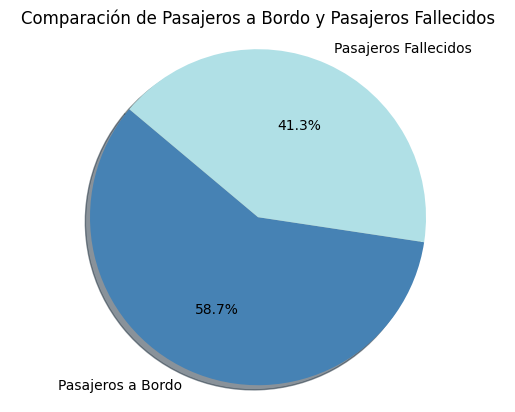

In [81]:
# Sumar la cantidad de pasajeros fallecidos y tripulación fallecida
total_pasajeros_a_bordo = AccidentesAviones['pasajeros_a_bordo'].sum()
total_pasajeros_fallecidos = AccidentesAviones['pasajeros_fallecidos'].sum()

# Crear un gráfico de torta
labels = 'Pasajeros a Bordo', 'Pasajeros Fallecidos'
sizes = [total_pasajeros_a_bordo, total_pasajeros_fallecidos]
colors = ['steelblue', 'powderblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio garantiza que la torta sea circular.

plt.title('Comparación de Pasajeros a Bordo y Pasajeros Fallecidos')

plt.show()

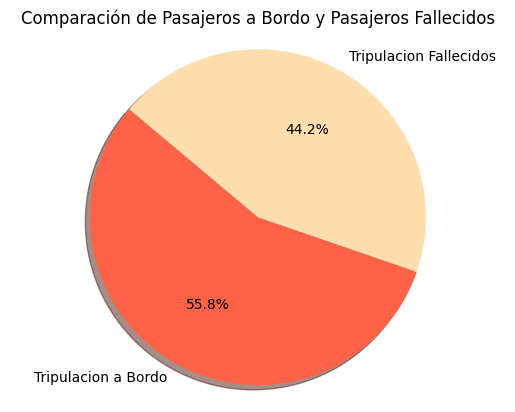

In [82]:
# Sumar la cantidad de pasajeros fallecidos y tripulación fallecida
total_tripulacion_a_bordo = AccidentesAviones['tripulacion_a_bordo'].sum()
total_tripulacion_fallecidos = AccidentesAviones['tripulacion_fallecida'].sum()

# Crear un gráfico de torta
labels = 'Tripulacion a Bordo', 'Tripulacion Fallecidos'
sizes = [total_tripulacion_a_bordo, total_tripulacion_fallecidos]
colors = ['tomato', 'navajowhite']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio garantiza que la torta sea circular.

plt.title('Comparación de Pasajeros a Bordo y Pasajeros Fallecidos')

plt.show()